## Охота на мусор
Процесс подготовки данных для дальнейшего анализа называется предобработка. Заключается она в поиске проблем, которые могут быть в данных, и в решении этих проблем.
В информатике работает принцип GIGO (от англ. garbage in — garbage out, буквально «мусор на входе — мусор на выходе»). Это значит, что при ошибках во входных данных даже правильный алгоритм работы выдаёт неверные результаты.
Посмотрите на этот срез данных 

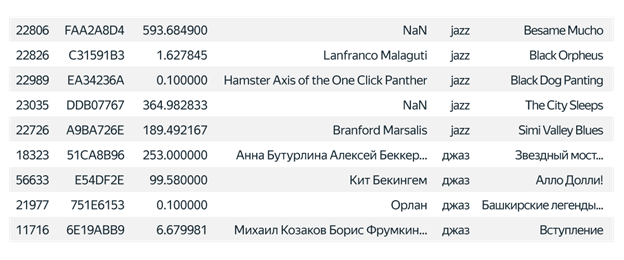
В столбце genre для одного жанра есть два названия: джаз и jazz. Если принять всё как есть, подсчёт прослушанных джазовых композиций даст два ответа — для жанра джаз и для жанра jazz, которые представляют одну и ту же сущность. Это помешает сделать правильные выводы об интересе пользователей к джазу, и может повлечь неверные решения.
Вообще сложности с данными бывают двух видов:

•	данные содержат мусор;

•	данные корректны, но представлены в такой форме, что малопригодны для анализа.

В этой теме мы раскроем базовые механизмы борьбы с часто встречаемыми проблемами. Из них самые очевидные, но в то же время самые опасные:

• некорректное именование столбцов

• дублирование значений

• отсутствующие значения (NaN)

Механизмы борьбы с ними — основа, с которой вы можете начать своё развитие как специалист по предобработке данных.

**Задача**
1. Загрузите датасет с данными из Яндекс.Музыка Вызовите метод info(), чтобы просмотреть сводку по всему набору данных.



In [38]:
#Youre code is here

Метод info() возвращает названия столбцов таблицы и сведения о типах данных в ней. Итак, наши проблемы:

•	В начале названия одного столбца явно есть несколько лишних пробелов. От них нужно избавиться.

•	Название из двух слов содержит пробел, который необходимо заменить на символ нижнего подчёркивания.

•	Названия должны быть на одном языке и набраны в одном регистре, чтобы не заучивать уникальный формат для каждого столбца.

•	Каждый столбец содержит определённый признак — крайне желательно, чтобы название столбца отражало в краткой форме, какая информация в нём содержится.

Рассмотрим  таблицу с расстояниями (в миллионах километров) от Земли до небесных тел.


In [39]:
import pandas as pd
measurements = [['Солнце',146,152], # Измерения хранятся в списке списков 
              ['Луна',0.36, 0.41], # measurements (англ. measurement, «измерение»).
              ['Меркурий',82, 217], 
              ['Венера',38, 261],
              ['Марс',56,401],
              ['Юпитер',588, 968],
              ['Сатурн',1195, 1660],
              ['Уран',2750, 3150],
              ['Нептун', 4300, 4700],
              ['Комета Галлея', 6, 5400]]
# Названия столбцов хранятся в переменной header.
header = ['Небесные тела ','MIN', 'MAX'] 
# Сохраним структуру данных в переменной celestial (англ. celestial, «небесный»).
celestial = pd.DataFrame(data = measurements, columns = header)  

Заметно, что столбцы называются на разных языках. Название Небесные тела содержит опасный пробел в конце, и слова этого названия разделены пробелом.

Символы за пределами базовой латиницы — недруги аналитика; от них надо избавляться в первую очередь. Правильно будет переименовать «Небесные тела» в celestial_bodies. MIN и MAX уже написаны латиницей, но эти сокращения мало говорят о том, что за цифры записаны в соответствующих столбцах. Хорошее решение — назвать их min_distance и max_distance. Так сразу понятно, что это минимальные и максимальные расстояния.

Чтобы изменить названия столбцов, воспользуйтесь методом set_axis(). Он принимает три аргумента:

•	cписок с новыми названиями столбцов;

•	axis — ось, которой новые названия присваиваются: 'index', если они даются строкам, и 'columns', если это список новых названий столбцов;

•	inplace. Принимает значения True либо False. В первом случае метод set_axis() перестраивает структуру данных так, что она замещает прежнюю в переменной с тем же именем.

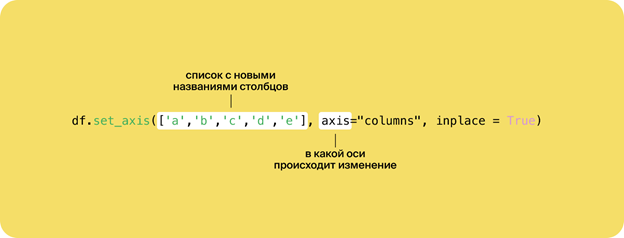



In [40]:
#Заменим названия столбцов таблицы с небесными телами.
celestial.set_axis(['celestial_bodies','min_distance','max_distance'], axis = 'columns', inplace = True) 
#Проверим результат:

print(celestial) 


  celestial_bodies  min_distance  max_distance
0           Солнце        146.00        152.00
1             Луна          0.36          0.41
2         Меркурий         82.00        217.00
3           Венера         38.00        261.00
4             Марс         56.00        401.00
5           Юпитер        588.00        968.00
6           Сатурн       1195.00       1660.00
7             Уран       2750.00       3150.00
8           Нептун       4300.00       4700.00
9    Комета Галлея          6.00       5400.00


Готово! Теперь эта таблица годится для анализа. Давайте проверим названия столбцов в данных Яндекс.Музыки.

**Задача**   
1.
Выведите список столбцов.

2.
Подготовьте список new_names с новыми именами для столбцов.

•	user_id → user_id

•	total play → total_play_seconds

•	Artist → artist_name

•	genre → genre_name

•	track → track_name

3.
Переименуем столбцы таблицы, которая хранится в переменной df.
Вызовите метод set_axis() и передайте ему список new_names, а значением аргумента inplace установите True.

4.
Проверьте, что получилось, запросив для нашей структуры данных df атрибут columns.



In [41]:
#Youre code is here

## Обработка пропущенных значений

Замены пропущенных значений в DataFrame бывают трёх видов:

1) Ожидаемые: None или NaN. None — это эквивалент null в других языках программирования: особое значение, указывающее, что в этой ячейке таблицы никакого значения нет. None относится к NoneType. NaN говорит о том, что в ячейке находится «не число». Основное отличие NaN в том, что его можно использовать в математических операциях, так как по типу это число с плавающей запятой.

2) Странные: плейсхолдеры (тексты-заполнители) какого-нибудь общепринятого стандарта, иногда неизвестного вам, но которого придерживаются составители. Чаще всего это n/a, na, NA, и N.N. либо NN.

3) Неожиданные: например, разработчики решили, что пустые значения в таблице будут заполняться знаками вопроса или нулями. В лучшем случае этот факт укажут в документации, в худшем – придётся просматривать данные самостоятельно. Если какой-нибудь спецсимвол или число встречаются часто, и этому нет внятного объяснения, то высока вероятность, что так передаются пропущенные значения.

Но будьте осторожны: иногда нули — это действительно нули, как в наборе данных Яндекс.Музыкка, где ноль показывает, что трек был пропущен (его слушали 0 секунд).


Рассмотрим методы борьбы с пропущенными значениями на примере данных ВОЗ о заболеваемости холерой в 2017 году:

In [42]:
cholera=pd.read_csv('D:/My Doc/сholera.csv', sep=';')

In [43]:
print(cholera)

     region                   country  total_cases  imported_cases  deaths  \
0      Азия                Афганистан         33.0             0.0     1.0   
1      Азия                     Индия        385.0             NaN     3.0   
2      Азия                      Иран        634.0           625.0     4.0   
3      Азия                     Йемен    1032481.0             0.0  2261.0   
4      Азия                     Китай         14.0             NaN     0.0   
5      Азия                     Катар          5.0             5.0     0.0   
6      Азия                  Малайзия          2.0             0.0     0.0   
7      Азия                     Непал          7.0             NaN     0.0   
8      Азия                       ОАЭ         12.0            12.0     0.0   
9      Азия         Саудовская Аравия          5.0             5.0     0.0   
10     Азия                  Сингапур          3.0             3.0     0.0   
11     Азия                   Таиланд          8.0             0

Для разных регионов (столбец 'region') и стран ('country') указано общее число случаев заболевания холерой
('total_cases'), в том числе завозные случаи ('imported_cases') и смертельные ('deaths'). 

Всё это целые числа, поскольку данные приведены с точностью до человека. 
Источник: Всемирная организация здравоохранения, Weekly Epidemiological Record), 21 September 2018, vol. 93, 38, pp. 489–500.

Посчитать в каждом столбце отсутствующие значения можно методом **.isnull()**. 
Если значение элемента не существует, **.isnull()** возвращает True, а иначе — False. 
Суммируют эти True вызовом метода **sum()**, который в этом случае возвращает общее число элементов без 
определённых значений.


In [44]:
print(cholera.isnull().sum()) 

region                 0
country                0
total_cases            1
imported_cases         6
deaths                 1
case_fatality_rate     1
notes                 21
dtype: int64


Также подойдёт метод **isna()**, подсчитывающий пустые значения. В таблице по холере пропущенные значения качественные, так что этот метод отыщет их все.

In [45]:
print(cholera.isna().sum()) 

region                 0
country                0
total_cases            1
imported_cases         6
deaths                 1
case_fatality_rate     1
notes                 21
dtype: int64


Метод борьбы с пропущенными значениями, который вы выберете, должен учитывать интересы решения конечной задачи бизнеса. В целом есть два пути: заполнить пропущенные значения на основе имеющихся данных или удалить все строки с пропущенными значениями.

Бизнес разрывается между двумя решениями: как потратить не слишком много времени и как не упустить данные, которые обычно чего-то стоят.

Если сейчас пойти по пути удаления всех строк, где есть пропущенные значения, можно потерять важные данные, например, в Африке было зафиксировано 179835 случаев заболевания, но ни одного завозного случая (это сейчас отмечено NaN). Удалив эту строку, мы потеряем важные данные для статистики.

Другая ситуация с Европой. Вся строка состоит из пропущенных значений. Примечание сообщает, что в 2017 году европейцы холерой не болели. Значит, строку можно удалить и это никак не повлияет на результат.
Чтобы не лишиться строк с важными данными, заполним значения NaN в столбце **'imported_cases'** нулями.
Для этого лучше всего использовать метод **fillna()**, где в качестве аргумента выступает заменитель отсутствующих значений.

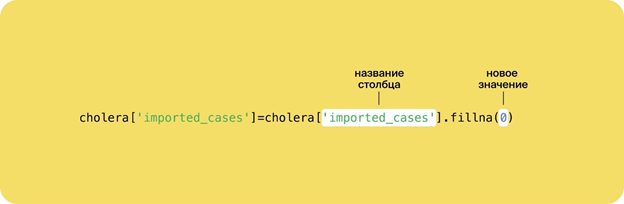




In [46]:
cholera['imported_cases']=cholera['imported_cases'].fillna(0)
print(cholera)

     region                   country  total_cases  imported_cases  deaths  \
0      Азия                Афганистан         33.0             0.0     1.0   
1      Азия                     Индия        385.0             0.0     3.0   
2      Азия                      Иран        634.0           625.0     4.0   
3      Азия                     Йемен    1032481.0             0.0  2261.0   
4      Азия                     Китай         14.0             0.0     0.0   
5      Азия                     Катар          5.0             5.0     0.0   
6      Азия                  Малайзия          2.0             0.0     0.0   
7      Азия                     Непал          7.0             0.0     0.0   
8      Азия                       ОАЭ         12.0            12.0     0.0   
9      Азия         Саудовская Аравия          5.0             5.0     0.0   
10     Азия                  Сингапур          3.0             3.0     0.0   
11     Азия                   Таиланд          8.0             0

От строк с нулевыми значениями избавляются методом **dropna()**. Он удаляет любую строку, где есть хоть одно отсутствующее значение.

У этого метода есть аргументы:

1.	**subset = [ ]**. Его значением указывают названия столбцов, где нужно искать пропуски.

2.	Уже знакомый нам **inplace**.

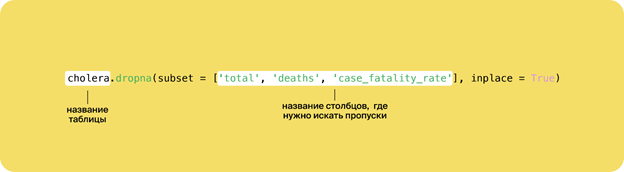


In [52]:
cholera.dropna(subset=['total_cases', 'deaths'], inplace=True)
print(cholera)

     region                   country  total_cases  imported_cases  deaths  \
0      Азия                Афганистан         33.0             0.0     1.0   
1      Азия                     Индия        385.0             0.0     3.0   
2      Азия                      Иран        634.0           625.0     4.0   
3      Азия                     Йемен    1032481.0             0.0  2261.0   
4      Азия                     Китай         14.0             0.0     0.0   
5      Азия                     Катар          5.0             5.0     0.0   
6      Азия                  Малайзия          2.0             0.0     0.0   
7      Азия                     Непал          7.0             0.0     0.0   
8      Азия                       ОАЭ         12.0            12.0     0.0   
9      Азия         Саудовская Аравия          5.0             5.0     0.0   
10     Азия                  Сингапур          3.0             3.0     0.0   
11     Азия                   Таиланд          8.0             0

Теперь удалим правый столбец с пропущенными значениями. 

Снова вызываем метод **dropna()**. Как и **set_axis()**, он имеет ещё и аргумент **axis**. Если этому аргументу присвоить значение **'columns'**, он удалит любой столбец, где есть хоть один пропуск.

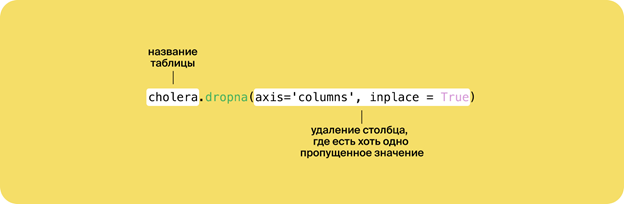


In [48]:
cholera.dropna(axis = 'columns', inplace = True) 
print(cholera) 


     region                   country  total_cases  imported_cases  deaths  \
0      Азия                Афганистан         33.0             0.0     1.0   
1      Азия                     Индия        385.0             0.0     3.0   
2      Азия                      Иран        634.0           625.0     4.0   
3      Азия                     Йемен    1032481.0             0.0  2261.0   
4      Азия                     Китай         14.0             0.0     0.0   
5      Азия                     Катар          5.0             5.0     0.0   
6      Азия                  Малайзия          2.0             0.0     0.0   
7      Азия                     Непал          7.0             0.0     0.0   
8      Азия                       ОАЭ         12.0            12.0     0.0   
9      Азия         Саудовская Аравия          5.0             5.0     0.0   
10     Азия                  Сингапур          3.0             3.0     0.0   
11     Азия                   Таиланд          8.0             0

Теперь таблица готова к дальнейшему изучению: ненужные пропуски удалены, но при этом сохранены важные данные.
Пропуски в данных появляются разными путями. Например, пользователь не указал о себе какие-нибудь сведения или автоматизированная система сбора информации дала сбой. Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами.


Давайте разберёмся с пропущенными значениями в данных для задачи Яндекс.Музыки.

# Задача

1.Просмотрите информацию о наборе данных: воспользуйтесь методом info().

2. Посчитайте количество пропущенных значений и выведите его на экран.

3. Для решения поставленной менеджером задачи важно сохранить содержание столбца 'genre_name'. Если по какой-то причине имя исполнителя и название трека оказались упущены, а жанр композиции известен, эту строку надо сберечь.
Заполните отсутствующие значения столбца 'track_name' строкой 'unknown'.

4. Заполните отсутствующие значения столбца 'artist_name' словом unknown.

5. Удалите пропущенные значения из столбца 'genre_name'.

6. Проверьте полученный результат. Просмотрите информацию о наборе данных: воспользуйтесь методом info().



## Обработка дубликатов

Когда мы говорим о дубликатах (дублированных записях), то представляем себе две одинаковых строки с идентичной информацией. Действительно, это дубликаты, и мы ещё разберём, как от них избавляться.


Но бывают и менее явные дубликаты: скажем, две якобы разные категории публикаций. К примеру, «Политика» и «Политическая ситуация». При агрегировании данных эти две категории будут отражены как разные подмножества набора данных, хотя на самом деле все публикации о политике нужно объединить в одну категорию. При всех возможностях Pandas важно изучать данные глазами и обдумывать их. Иначе вас ожидает масса неприятных сюрпризов.


Помимо вредного влияния дубликатов на результат, их наличие затягивает процесс анализа. Большое количество повторов неоправданно раздувает размер таблицы, а значит, увеличивает время обработки данных.
Грубые дубликаты — повторы — обнаруживают методом **duplicated()**. Он возвращает **Series** со значением **True** при наличии дубликатов, и **False**, когда их нет.

**print(df.duplicated())**

Чтобы посчитать количество дубликатов в наборе данных, нужно вызвать метод **sum()**:

**print(df.duplicated().sum())** 
 
Для удаления дубликатов есть метод **drop_duplicates()**:

**df.drop_duplicates(inplace = True)** 

При вызове метода **drop_duplicates()** вместе с повторяющимися строками удаляются их индексы.

Последовательность индексов нарушается: после 0 следует 2 и т.д.

Поэтому вызов **drop_duplicates()** соединяют в цепочку с вызовом метода **reset_index()**. Тогда создаётся новый **DataFrame**, где старые индексы превращаются в обычный столбец под названием **index**, а индексы всех строк снова следуют в естественном порядке.
Если же мы не хотим создавать новый столбец **index**, то при вызове **reset_index()** передаётся аргумент **drop** со значением **True**. Все индексы переписываются в порядке возрастания, без пропусков.

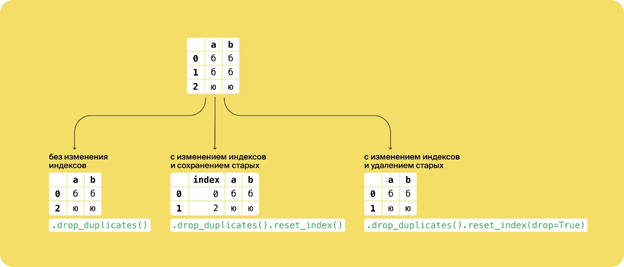



Дубликаты в названиях категорий отследить сложнее, но всё-таки можно. Для просмотра всех уникальных значений в столбце используется метод **unique()**.

Рассмотрим таблицу с рейтингом первой ракетки мира.





In [49]:
rating = ['date','name','points']
players = [
['2018.01.01',    'Рафаэль Надаль',10645],
['2018.01.08',    'Рафаэль Надаль',    10600],
['2018.01.29',    'Рафаэль Надаль',    9760],
['2018.02.19',    'Роджер Федерер',    10105],    
['2018.03.05',    'Роджер Федерер',    10060],
['2018.03.19',    'Роджер Федерер',    9660],
['2018.04.02',    'Рафаэль Надаль',    8770],
['2018.06.18',    'Roger Federer',    8920],
['2018.06.25',    'Рафаэль Надаль',    8770],
['2018.07.16',    'Рафаэль Надаль',    9310],
['2018.08.13',    'Рафаэль Надаль',    10220],
['2018.08.20',    'Рафаэль Надаль',    10040],
['2018.09.10',    'Рафаэль Надаль',    8760],
['2018.10.08',    'Рафаэль Надаль',    8260],
['2018.10.15',    'Рафаэль Надаль',    7660],
['2018.11.05',    'Новак Джокович',    8045],
['2018.11.19',    'Новак Джокович',    9045]
]
tennis = pd.DataFrame(data = players, columns= rating)
print(tennis) 


          date            name  points
0   2018.01.01  Рафаэль Надаль   10645
1   2018.01.08  Рафаэль Надаль   10600
2   2018.01.29  Рафаэль Надаль    9760
3   2018.02.19  Роджер Федерер   10105
4   2018.03.05  Роджер Федерер   10060
5   2018.03.19  Роджер Федерер    9660
6   2018.04.02  Рафаэль Надаль    8770
7   2018.06.18   Roger Federer    8920
8   2018.06.25  Рафаэль Надаль    8770
9   2018.07.16  Рафаэль Надаль    9310
10  2018.08.13  Рафаэль Надаль   10220
11  2018.08.20  Рафаэль Надаль   10040
12  2018.09.10  Рафаэль Надаль    8760
13  2018.10.08  Рафаэль Надаль    8260
14  2018.10.15  Рафаэль Надаль    7660
15  2018.11.05  Новак Джокович    8045
16  2018.11.19  Новак Джокович    9045


В 2018 году рейтинг первой ракетки мира по версии ATP обновлялся 17 раз. Но спортсменов с самым большим в мире профессионального тенниса рейтингом гораздо меньше. Если применить ко второму столбцу метод **unique()**, возвращаются только три имени.

In [50]:
print(tennis['name'].unique()) 

['Рафаэль Надаль' 'Роджер Федерер' 'Roger Federer' 'Новак Джокович']


Кроме имени Роджера Федерера на русском языке, вернулось его же имя латиницей. Это тоже дубликат. Нужно заменить этот артефакт правильным именем на русском языке.
Такие задачи решает метод **replace()**, где первый аргумент — текущее значение, а второй — новое, нужное.


In [54]:
tennis['name'] = tennis['name'].replace('Roger Federer', 'Роджер Федерер') 
print(tennis['name'])

0     Рафаэль Надаль
1     Рафаэль Надаль
2     Рафаэль Надаль
3     Роджер Федерер
4     Роджер Федерер
5     Роджер Федерер
6     Рафаэль Надаль
7     Роджер Федерер
8     Рафаэль Надаль
9     Рафаэль Надаль
10    Рафаэль Надаль
11    Рафаэль Надаль
12    Рафаэль Надаль
13    Рафаэль Надаль
14    Рафаэль Надаль
15    Новак Джокович
16    Новак Джокович
Name: name, dtype: object


Теперь всё хорошо. Настало время разобраться с дубликатами в таблице данных Яндекс.Музыки.
# Задача  

1.Сохраните текущий размер таблицы в переменной shape_table.

2. Посчитайте и выведите на экран суммарное количество дубликатов в таблице.

3. Удалите дубликаты. Используйте метод reset_index() для сохранения порядка индексов.

4. Сохраните в переменную shape_table_update размер таблицы после удаления дубликатов.

5. Сравните переменные shape_table и shape_table_update. Если они равны, выведите сообщение 'Размер таблицы не изменился, текущий размер: ' и значение переменной shape_table_update.

6. Получите уникальные значения столбца 'genre_name', используйте метод unique(). Просмотрите результат и найдите название жанра, которое выпадает из общего ряда.

7. В столбце 'genre_name' замените значение 'электроника' на 'electronic' .

8. Оцените изменения: пересчитайте количество значений 'электроника' в столбце 'genre_name'. Если удалось всё заменить, результат должен быть равен 0. Сохраните этот результат в переменной genre_final_count, выведите на экран.



In [ ]:
#Youre code is here